In [364]:
import time

import numpy as np
import pandas as pd
import copy

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [365]:
data = pd.read_csv('./data/admission-predict.csv')
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [366]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [368]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


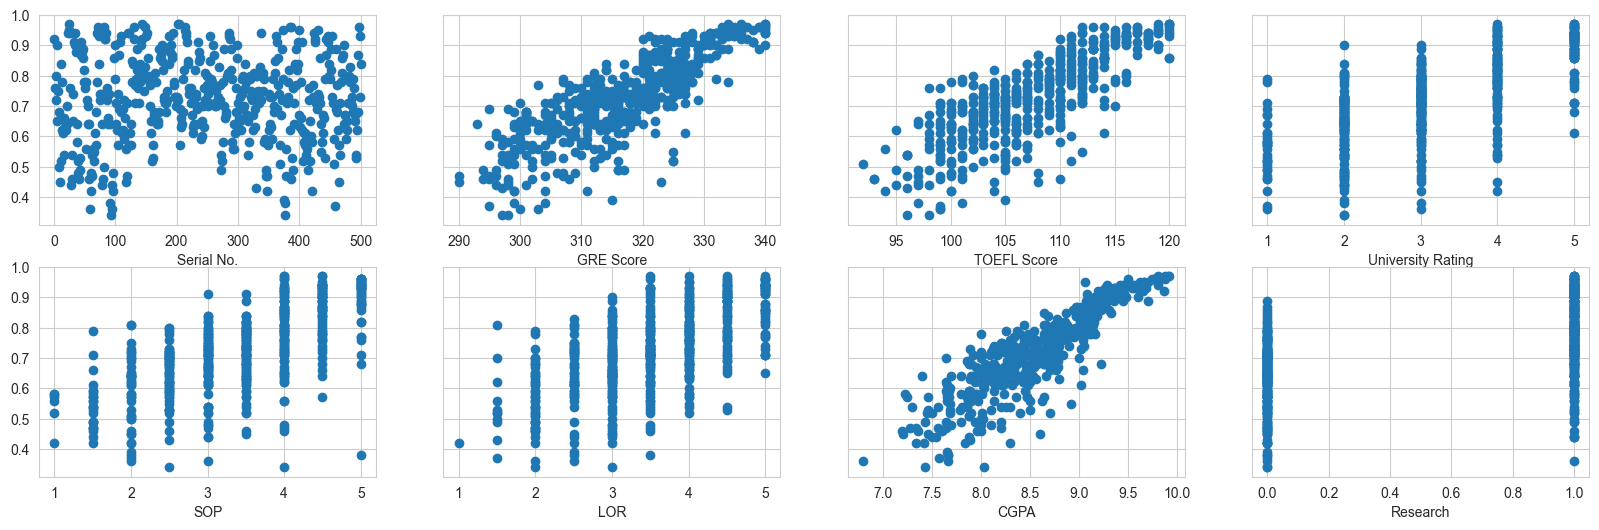

In [369]:
rows, cols = 2, 4
fig, ax = plt.subplots(rows, cols, figsize=(20, 6), sharey=True)

for i in range(rows*cols):
    ax[i//cols, i%cols].scatter(data.iloc[:, i], data.iloc[:, -1])
    ax[i//cols, i%cols].set_xlabel(data.columns.tolist()[i])

plt.show()

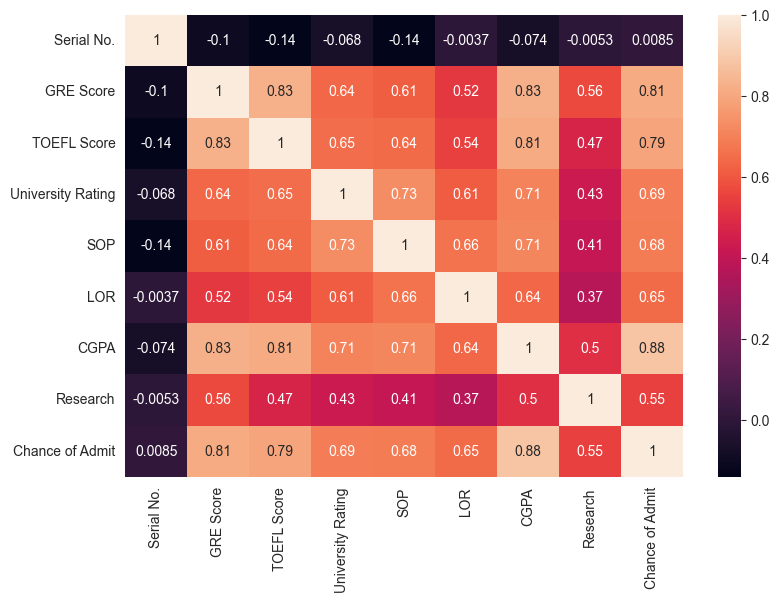

In [370]:
sns.heatmap(data.corr(), annot=True)

plt.rcParams['figure.figsize'] = (9,6)

plt.show()

In [371]:
predictor = "Chance of Admit"

X_train = data.loc[:, data.columns != predictor]
Y_train = data.loc[:, data.columns == predictor]

In [372]:
def calc_mse(y_pred, y_actual):
    n = y_actual.shape[0]
    
    total_error_sq = np.sum((y_pred.squeeze() - y_actual.squeeze())**2, axis=0)
    return (1/(2*n)) * total_error_sq

In [373]:
def multi_gradient_descent(x, y, w, b, iterations, epsilon, alpha):
        w = copy.deepcopy(w)[:, np.newaxis]
        error_hist = []
        n, m = x.shape
        
        for _ in range(iterations):
            predictions = np.dot(x, w) + b.squeeze()
            error = predictions - y
        
            dy_dw = np.dot(x.T, error)
            dy_db = np.sum(error, axis=0)
            
            dy_dw /= n
            dy_db /= n
            
            w -= alpha * dy_dw
            b -= alpha * dy_db
            
            error_hist.append(calc_mse(np.dot(X_train, w).squeeze() + b.squeeze(), y.squeeze()))
            
            
        return w, b, error_hist

In [374]:
num_of_iters = 30000
epsilon = 0.001
alpha = 0.000000001

initial_w = np.zeros((X_train.shape[1],))
initial_b = np.zeros((1,))

t_start = time.time()
w_final, b_final, error_hist = multi_gradient_descent(X_train, Y_train, initial_w, initial_b, num_of_iters, epsilon, alpha)
t_stop = time.time()

y_pred = np.dot(X_train, w_final) + b_final.squeeze()

print(f'MSE with final weights: {calc_mse(Y_train, y_pred):.4f}')
print(f'GD total time: {t_stop - t_start}')

MSE with final weights: 0.0131
GD total time: 23.850029706954956


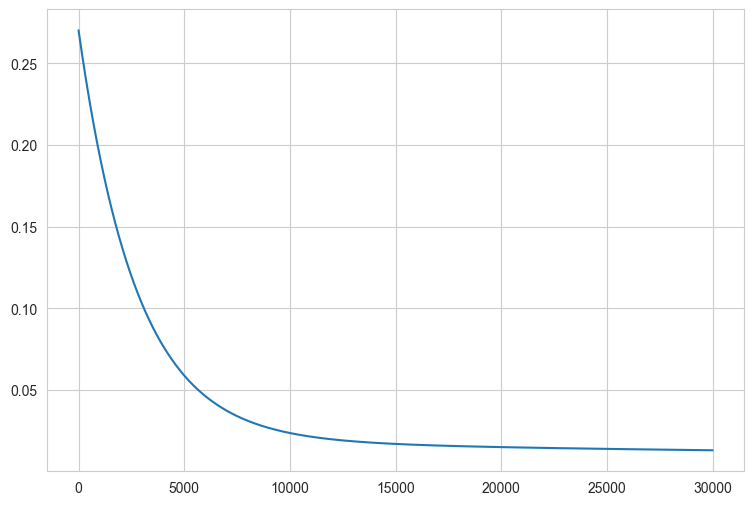

In [375]:
plt.plot([x for x in range(len(error_hist))], error_hist)
plt.show()

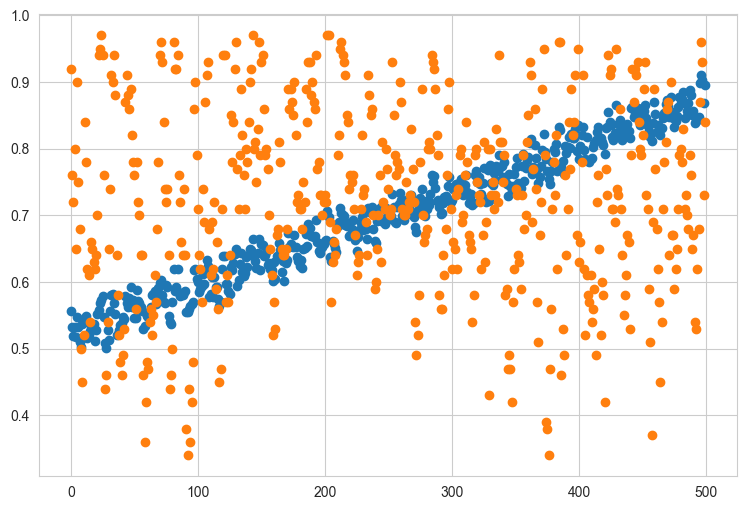

In [376]:
plt.scatter([x for x in range(Y_train.shape[0])], y_pred)
plt.scatter([x for x in range(Y_train.shape[0])], Y_train)

plt.show()

# Normalization of Feature Data 

In [377]:
def mean_normalization(data):
    return (data - data.mean()) / (data.max() - data.min())    

In [378]:
def z_score_normalization(data):
    return (data - data.mean()) / (data.std())

In [379]:
data_mean_normal = mean_normalization(data)
data_mean_normal

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,-0.500000,0.41056,0.386000,0.2215,0.2815,0.254,0.344090,0.44,0.314698
1,-0.497996,0.15056,-0.006857,0.2215,0.1565,0.254,0.094090,0.44,0.060730
2,-0.495992,-0.00944,-0.114000,-0.0285,-0.0935,0.004,-0.184756,0.44,-0.002762
3,-0.493988,0.11056,0.100286,-0.0285,0.0315,-0.246,0.029987,0.44,0.124222
4,-0.491984,-0.04944,-0.149714,-0.2785,-0.3435,-0.121,-0.117449,-0.56,-0.113873
...,...,...,...,...,...,...,...,...,...
495,0.491984,0.31056,0.028857,0.4715,0.2815,0.129,0.142167,0.44,0.235333
496,0.493988,0.41056,0.350286,0.4715,0.4065,0.379,0.414603,0.44,0.378190
497,0.495992,0.27056,0.457429,0.4715,0.2815,0.379,0.315244,0.44,0.330571
498,0.497996,-0.08944,-0.149714,0.2215,0.1565,0.379,-0.046936,-0.56,0.013111


In [380]:
data_z_normal = z_score_normalization(data)
data_z_normal

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,-1.726861,1.817417,1.777086,0.774806,1.136222,1.097845,1.775029,0.885518,1.404701
1,-1.719939,0.666481,-0.031569,0.774806,0.631683,1.097845,0.485373,0.885518,0.271078
2,-1.713018,-0.041788,-0.524839,-0.099693,-0.377395,0.017289,-0.953088,0.885518,-0.012328
3,-1.706097,0.489414,0.461700,-0.099693,0.127144,-1.063267,0.154692,0.885518,0.554483
4,-1.699176,-0.218855,-0.689262,-0.974192,-1.386473,-0.522989,-0.605873,-1.127023,-0.508288
...,...,...,...,...,...,...,...,...,...
495,1.699176,1.374750,0.132854,1.649305,1.136222,0.557567,0.733384,0.885518,1.050443
496,1.706097,1.817417,1.612663,1.649305,1.640761,1.638123,2.138777,0.885518,1.688106
497,1.713018,1.197682,2.105932,1.649305,1.136222,1.638123,1.626222,0.885518,1.475552
498,1.719939,-0.395922,-0.689262,0.774806,0.631683,1.638123,-0.242125,-1.127023,0.058523


In [381]:
predictor = "Chance of Admit"

X_train = data_z_normal.loc[:, data_z_normal.columns != predictor]
Y_train = data_z_normal.loc[:, data_z_normal.columns == predictor]

In [388]:
num_of_iters = 5000
epsilon = 0.001
alpha = 0.3

initial_w = np.zeros((X_train.shape[1],))
initial_b = np.zeros((1,))

t_start = time.time()
w_final, b_final, error_hist = multi_gradient_descent(X_train, Y_train, initial_w, initial_b, num_of_iters, epsilon, alpha)
t_stop = time.time()

y_pred = np.dot(X_train, w_final) + b_final.squeeze()

print(f'MSE with final weights: {calc_mse(Y_train, y_pred):.4f}')
print(f'GD total time: {t_stop - t_start}')

MSE with final weights: 0.0851
GD total time: 3.86039400100708


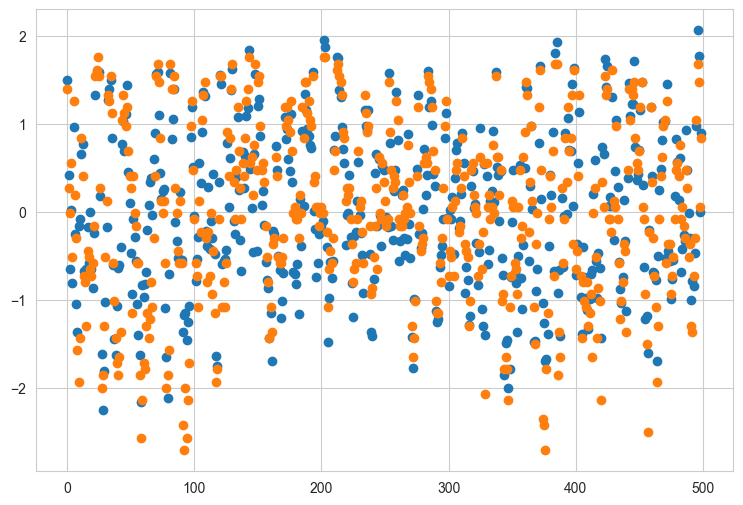

In [389]:
plt.scatter([x for x in range(Y_train.shape[0])], y_pred)
plt.scatter([x for x in range(Y_train.shape[0])], Y_train)

plt.show()

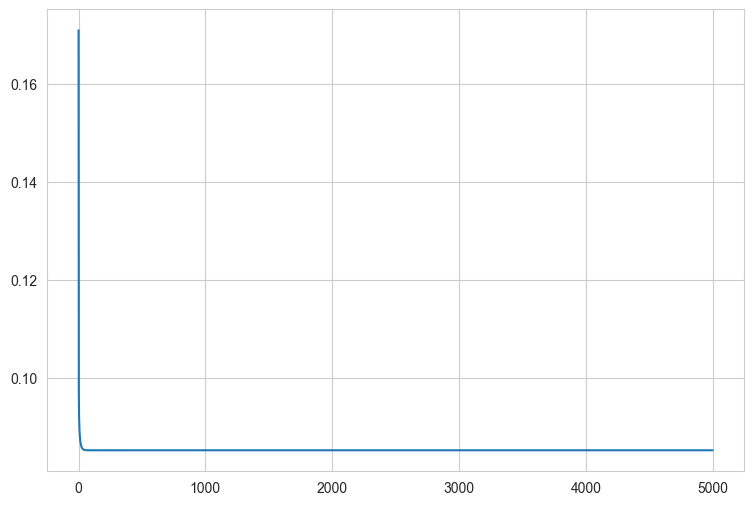

In [390]:
plt.plot([x for x in range(len(error_hist))], error_hist)
plt.show()

# Comparison to Sklearn LR

### Normalize the training data

In [391]:
scaler = sklearn.preprocessing.StandardScaler()
X_norm = scaler.fit_transform(X_train)

### Create and Fit the training data

In [392]:
sgdr = sklearn.linear_model.SGDRegressor(max_iter=100000)
sgdr.fit(X_norm, Y_train.squeeze())

SGDRegressor(max_iter=100000)

In [396]:
print(f'My Intercept: {b_final}')
print(f'My Weights: {w_final}')

My Intercept: Chance of Admit   -2.319211e-15
dtype: float64
My Weights: [[0.08885604]
 [0.15378728]
 [0.13757898]
 [0.0430734 ]
 [0.03206016]
 [0.09779771]
 [0.49517943]
 [0.07930058]]


In [394]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f'Intercept: {b_norm}')
print(f'Weights: {w_norm}')

Intercept: [0.00294532]
Weights: [0.09413547 0.18570232 0.15976786 0.04867621 0.04554986 0.10304955
 0.40865602 0.07738699]


### Make Predictions and Plot Results

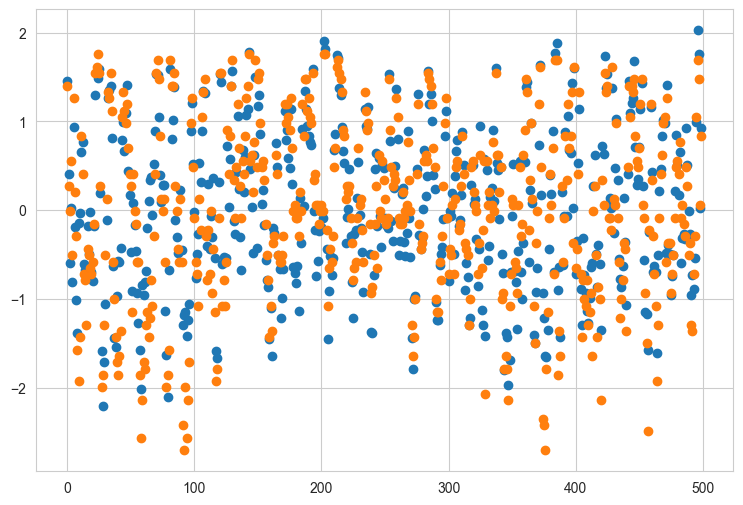

In [397]:
y_pred_sgdr = sgdr.predict(X_norm)

plt.scatter([x for x in range(Y_train.shape[0])], y_pred_sgdr)
plt.scatter([x for x in range(Y_train.shape[0])], Y_train)

plt.show()

In [398]:
print(f'MSE with final weights: {calc_mse(Y_train, y_pred_sgdr):.4f}')

MSE with final weights: 0.0860
